# Group Project - Final

### By: Grace, Molly, Lily, and Jonathan

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.linear_model import LinearRegression
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data used and Exploratory Analysis

The data set used here is from UC Irvine Machine Learning Repository. It shows student's performance in Portuguese in secondary education from schools in Portugal.

In [2]:
file_location = '~/Group Project/Data-Science-Group-Student-Life-/student-por.csv'
DF_2 = pd.read_csv(file_location,na_filter=False)

In [3]:
DF_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
DF_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
DF_2.value_counts

<bound method DataFrame.value_counts of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... fa

In [6]:
DF_2.shape

(649, 33)

In [7]:
DF_2.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

All of the code above is a basic analysis of the data set. It shows how many variable and observations, the column names, some numerical information, etc. 

In [8]:
DF_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [20]:
my_columns = ['studytime', 'absences', 'freetime', 'activities', 'G3']
DF_2[my_columns] #this is a more focused version of our data, showing just the variables we want to focus on

,studytime,absences,freetime,activities,G3
0,2,4,3,no,11
1,2,2,3,no,11
2,2,6,3,no,12
3,3,0,2,yes,14
4,2,0,3,no,13
...,...,...,...,...,...
644,3,4,4,yes,10
645,2,4,3,no,16
646,2,6,1,yes,9
647,1,6,4,no,10


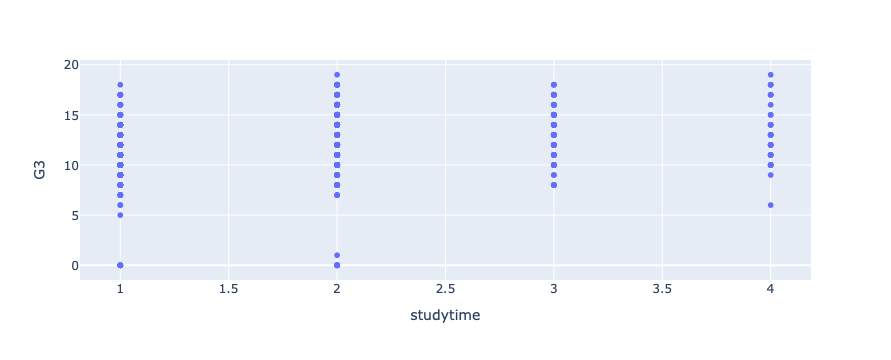

In [21]:
fig = px.scatter(DF_2,
                   x= 'studytime',
                   y= 'G3')
fig

This is a scatter plot that compares the students overall GPA to the amount of time they studied. It does not show a direct correlation of one truly effecting the other.

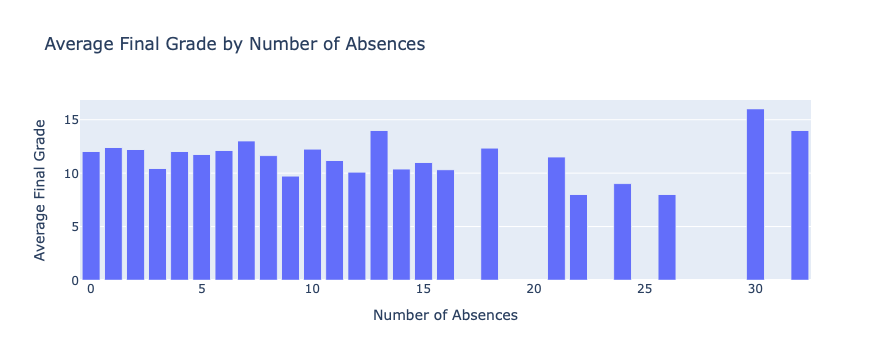

In [11]:
newDF_2 = DF_2.groupby('absences')['G3'].mean().reset_index()



fig = px.bar(newDF_2,
             x='absences',
             y='G3',
             title='Average Final Grade by Number of Absences',
             labels={'G3': 'Average Final Grade', 'absences': 'Number of Absences'})

fig

This bar graph compares the number of absences a student has and the average GPA. The problem with this graph is that it is skewed because it doesn't show how many students belong to each group.

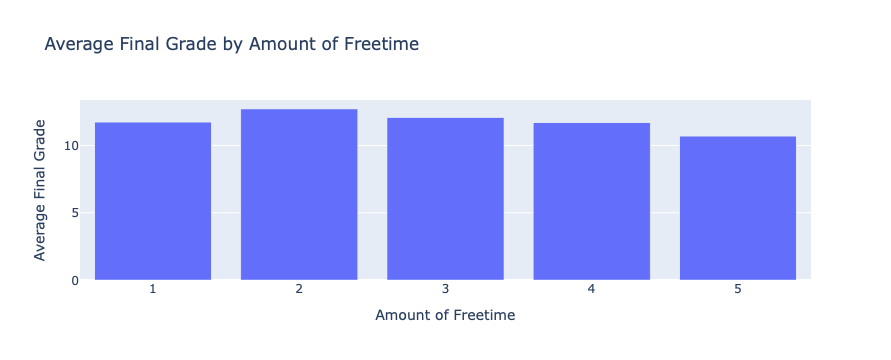

In [12]:
newDF_2 = DF_2.groupby('freetime')['G3'].mean().reset_index()

fig = px.bar(newDF_2,
             x='freetime',
             y='G3',
             title='Average Final Grade by Amount of Freetime',
             labels={'G3': 'Average Final Grade', 'freetime': 'Amount of Freetime'})

fig

This bar graph compares average GPA to the amount of freetime the students have. It shows that students with two hours of freetime have the highest average GPA.

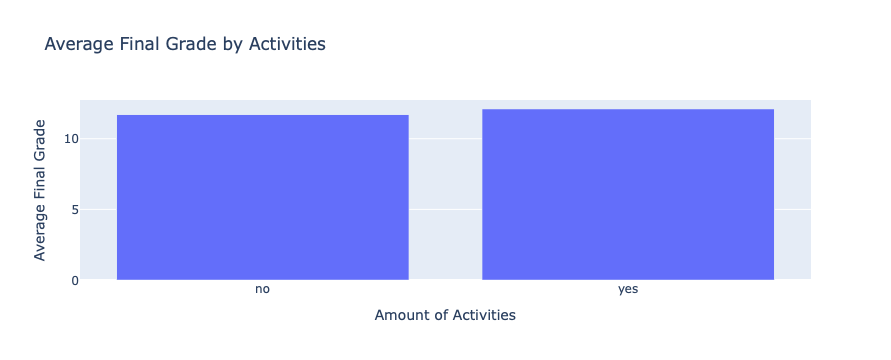

In [13]:
newDF_2 = DF_2.groupby('activities')['G3'].mean().reset_index()

fig = px.bar(newDF_2,
             x='activities',
             y='G3',
             title='Average Final Grade by Activities',
             labels={'G3': 'Average Final Grade', 'activities': 'Amount of Activities'})

fig

This bar graph compares the students average final GPA to whether or not they participate in extracurricular activities. It shows that students who did participate tend to have the higher GPA.

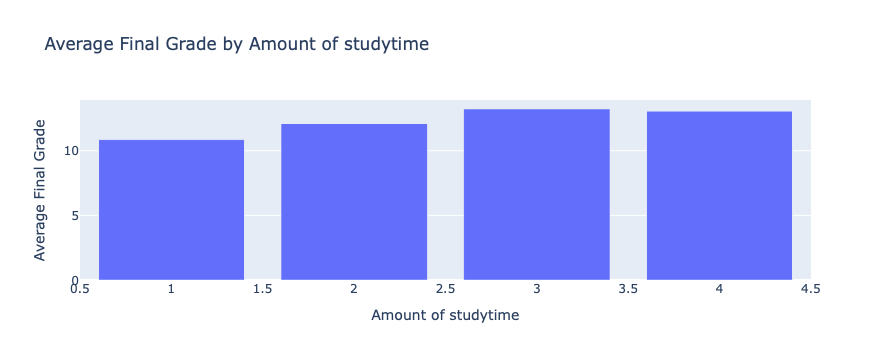

In [14]:
newDF_2 = DF_2.groupby('studytime')['G3'].mean().reset_index()

fig = px.bar(newDF_2,
             x='studytime',
             y='G3',
             title='Average Final Grade by Amount of studytime',
             labels={'G3': 'Average Final Grade', 'studytime': 'Amount of studytime'})

fig

This is the final bar graph using or chosen variables. It compares average final GPA to the amount of hours the students would study. As you could assume, it shows that the longer the students studied the higher GPA they had.

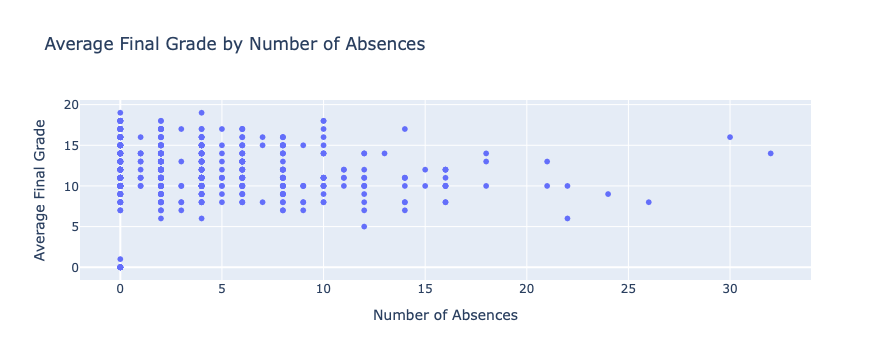

In [15]:

fig = px.scatter(DF_2,
             x='absences',
             y='G3',
             title='Average Final Grade by Number of Absences',
             labels={'G3': 'Average Final Grade', 'absences': 'Number of Absences'})

fig

As mentioned earlier, the bar grpah using these variables had skewed data due to the graph not factoring in how many students belonged in each category. You can see this more clearly in this scatter plot. This is also shown in the vlaue counts provided below this. 

In [16]:
DF_2.value_counts('absences')

absences
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
7       3
18      3
15      2
21      2
22      2
13      1
24      1
26      1
30      1
32      1
Name: count, dtype: int64

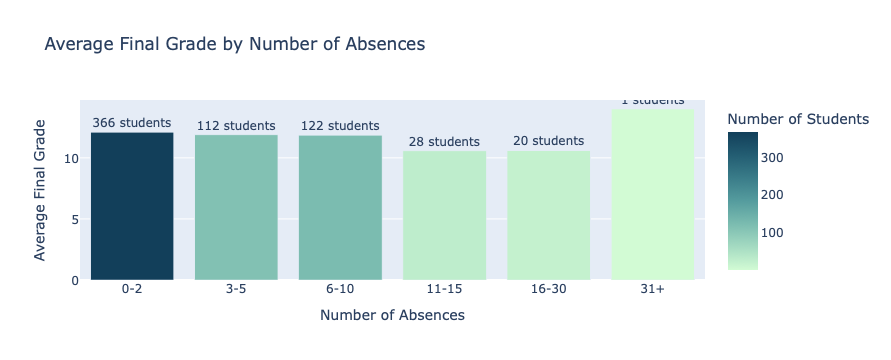

In [17]:
labels = ['0-2', '3-5', '6-10', '11-15', '16-30', '31+']

bins = [0, 3, 6, 11, 16, 31, float('inf')]  

DF_2['absence_2'] = pd.cut(DF_2['absences'], bins=bins, labels=labels, right=False)

grouped_data = DF_2.groupby('absence_2').agg(
    avg_grade=('G3', 'mean'),
    student_count=('G3', 'count')
).reset_index()

fig = px.bar(grouped_data,
             x='absence_2',
             y='avg_grade',
             title='Average Final Grade by Number of Absences',
             labels={'avg_grade': 'Average Final Grade', 'absence_2': 'Number of Absences'},
             text='student_count',  
             color='student_count',  
             color_continuous_scale='darkmint')

fig.update_traces(texttemplate='%{text} students', textposition='outside')
fig.update_layout(
    xaxis_title="Number of Absences",
    yaxis_title="Average Final Grade",
    coloraxis_colorbar_title="Number of Students"
)

fig 

This new graph shows the average final grade compared to the number of absences, but it also tells us how mnay students are in each group now. This shows that while it may appear that the students with 31+ absenes have the highest GPA, there is actually only one student represented in that section. When that is taken into consideration, you can see that there are actually 366 students who average out to the next highest GPA.

In [24]:
new2_DF_2= DF_2.groupby('absences')['G3'].mean().reset_index()

X = DF_2[['absences']].values.reshape(-1,1)
y=DF_2['G3']


LM=LinearRegression()
LM.fit(X,y)

LinearRegression()

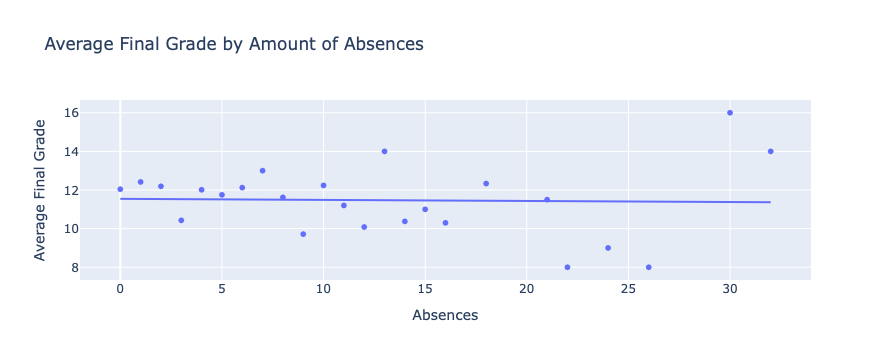

In [25]:
fig = px.scatter(new2_DF_2,
                 x='absences',
                 y='G3',
                 trendline='ols',
                 title='Average Final Grade by Amount of Absences',
                 labels={'G3': 'Average Final Grade', 'absences': 'Absences'}
                  )   



fig.show()

This graph is another representation of the outliers in this data. You can see that the line is slightly negative, moving downwards, but there are data points that skew this line.